# This notebook generates figure04, which shows different atomic displacement rates caused by protons of 150, 800, 1200, and 2400 keV in the REBCO layer at a fixed power of 36 mW

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

import sys, os, importlib, seaborn as sns, pandas as pd

outputDirectory = 'raw/'
parentDirectory = 'data/'
sys.path.append('../../../')
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')

import default_style as dfs
import hts_dosecalculations as dose
import hts_fitfunctions as ff

from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# First we find the energy of a protons after traversing a 2 um thick Ag layer

This is done to circumvent the boundary artefacts in SRIM,visible in the damage profiles below. Knowing the energy of the proton as it exits the Ag layer allows us to restart a calculation in a pure YBCO target at the prescribed energy to obtain a smooth continuous profile.

<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/469456830.py:29: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Distance traveled in Ag [$\mu$m]')
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/469456830.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(fpath, skiprows=23, nrows=nr, usecols=[0, 1, 4, 5], names=['energy_keV', 'energy_units', 'range_A', 'range_units'], delim_whitespace=True)
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/469456830.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.0557 0.0609 0.0661 0.0713 0.0764 0.0814 0.0865 0.0915 0.0965 0.1063
 0.1185 0.1306 0.1424 0.1542 0.1658 0.1774 0.1888 0.20

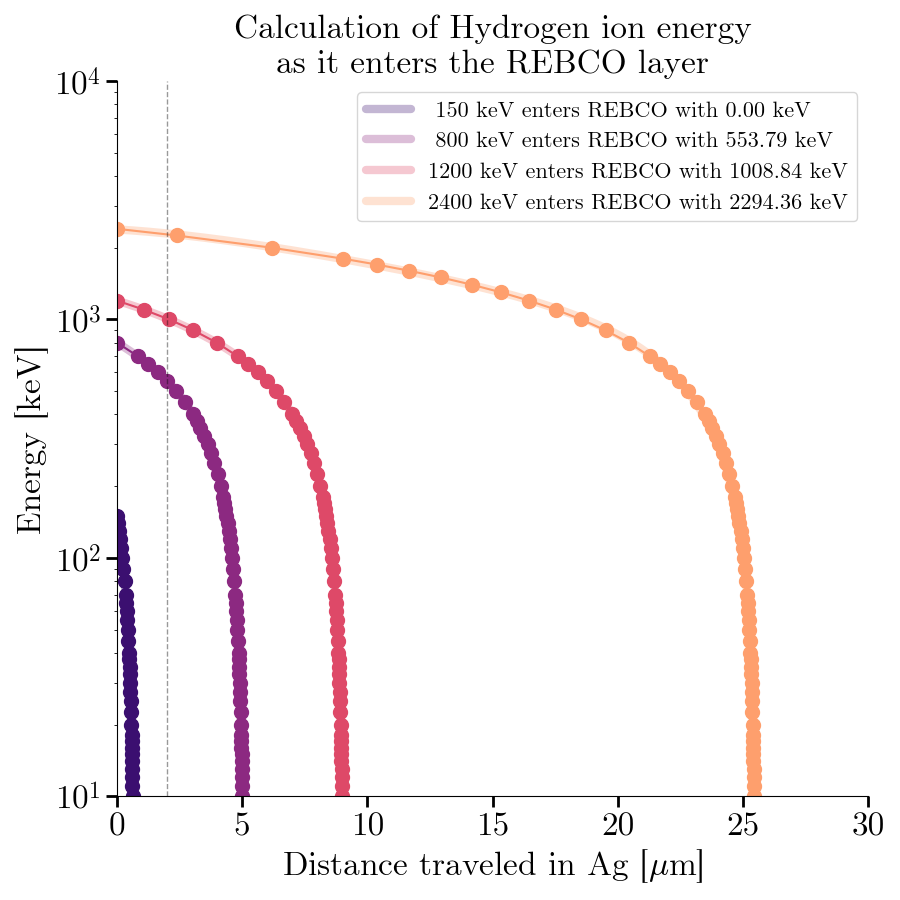

In [2]:
ffunction = ff.poly5

fpaths = [
    parentDirectory+'AgTarget_0150keVH.txt',
    parentDirectory+'AgTarget_0800keVH.txt',
    parentDirectory+'AgTarget_1200keVH.txt',
    parentDirectory+'AgTarget_2400keVH.txt'
]
nrows = [32, 51, 55, 64]

fig, ax = plt.subplots()
for fpath, nr in zip(fpaths, nrows):
    data = pd.read_csv(fpath, skiprows=23, nrows=nr, usecols=[0, 1, 4, 5], names=['energy_keV', 'energy_units', 'range_A', 'range_units'], delim_whitespace=True)
    data.loc[data.range_units == 'A', 'range_A'] *= 1e-4
    data.loc[data.energy_units == 'MeV', 'energy_keV'] *= 1e3
    x, y = -1*(data.range_A-data.range_A.max()), data.energy_keV
    popt, pcov = curve_fit(ffunction, x, y)
    xsmooth = np.linspace(x.min(), x.max(), 10000)
    ysmooth = ffunction(xsmooth, *popt)
    e0 = y.iloc[-1]
    if e0 != 150:
        e0REBCO = ysmooth[np.argmin(np.abs(xsmooth-2))]
    else:
        e0REBCO = 0
    ax.semilogy(x, y, marker='o', color=dfs.colors_energies[str(int(e0))])
    ax.semilogy(xsmooth, ysmooth, color=dfs.colors_energies[str(int(e0))], linewidth=6, alpha=.3, label='{:4.0f} keV enters REBCO with {:<4.2f} keV'.format(e0, e0REBCO))
        
ax.axvline(2, linestyle='--', color='k', linewidth=1, alpha=.4)
ax.set_xlabel('Distance traveled in Ag [$\mu$m]')
ax.set_ylabel('Energy [keV]')
ax.set_title('Calculation of Hydrogen ion energy\nas it enters the REBCO layer')
ax.set_ylim(1e1, 1e4)
ax.set_xlim(0, 30)
ax.legend()
fig.tight_layout()

## Here use a pure YBCO target and a Quick-SRIM calculation (Kinchin-Pease) and extract the vacancies/A.ion corresponding to a proton beam with the degraded energy obtained in the previous step.

The plots below show (i) the stopping of a degraded proton (in red) through the YBCO target, which will have lost most of its energy just before the Bragg peak (damage profile in blue); (ii) the damage profile as a function of energy; and (iii) the damage profile as a function of depth. In both cases, the colors indicate the part of the curve that corresponds to the damage caused in 2 um of YBCO by the degraded protons of the initial energy of choice (800, 1200, 2400 keV).

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/4235383953.py:21: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Distance traveled in YBCO [$\mu$m]')
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/4235383953.py:55: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel('Depth [$\mu$m]')
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/4235383953.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  datafp = pd.read_csv(parentDirectory+'2024-05-04_22-17-58_YBCO_H_2400keV_1000000ions_KP/2024-05-05-02-57-59-902061-1000000H-2400keV-1.txt', delim_whitespace=True, usecols=[0, 3], names=['depth', 'fp'], skiprows=1)
/var/folder

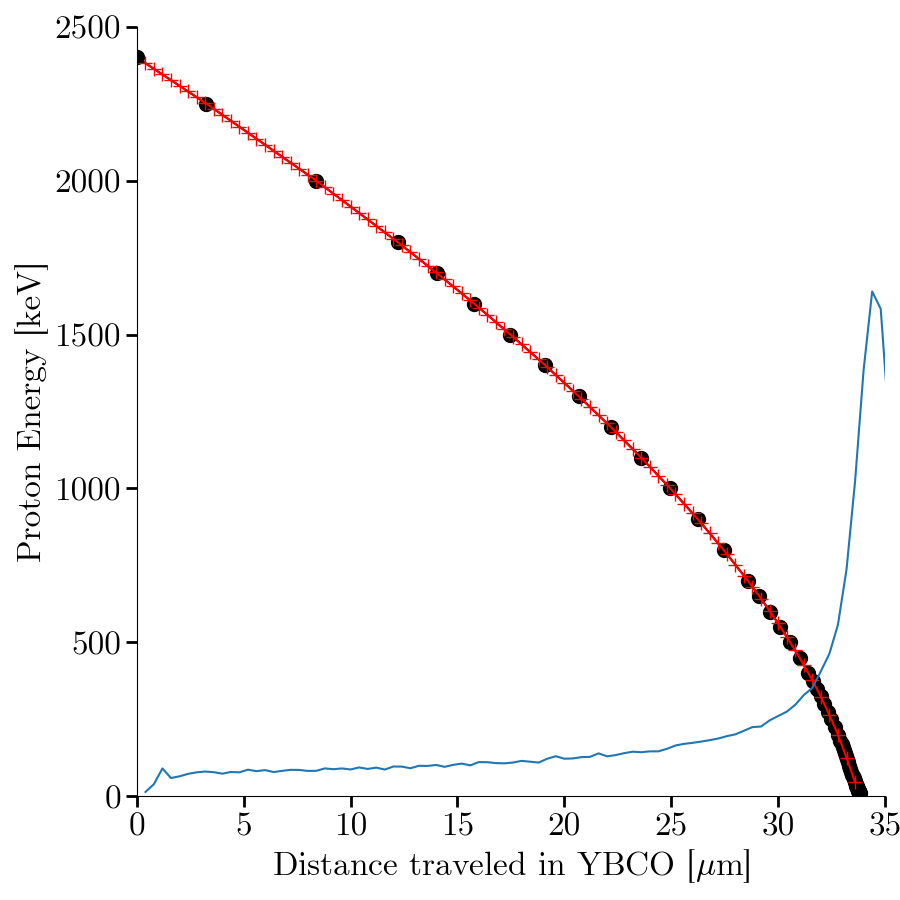

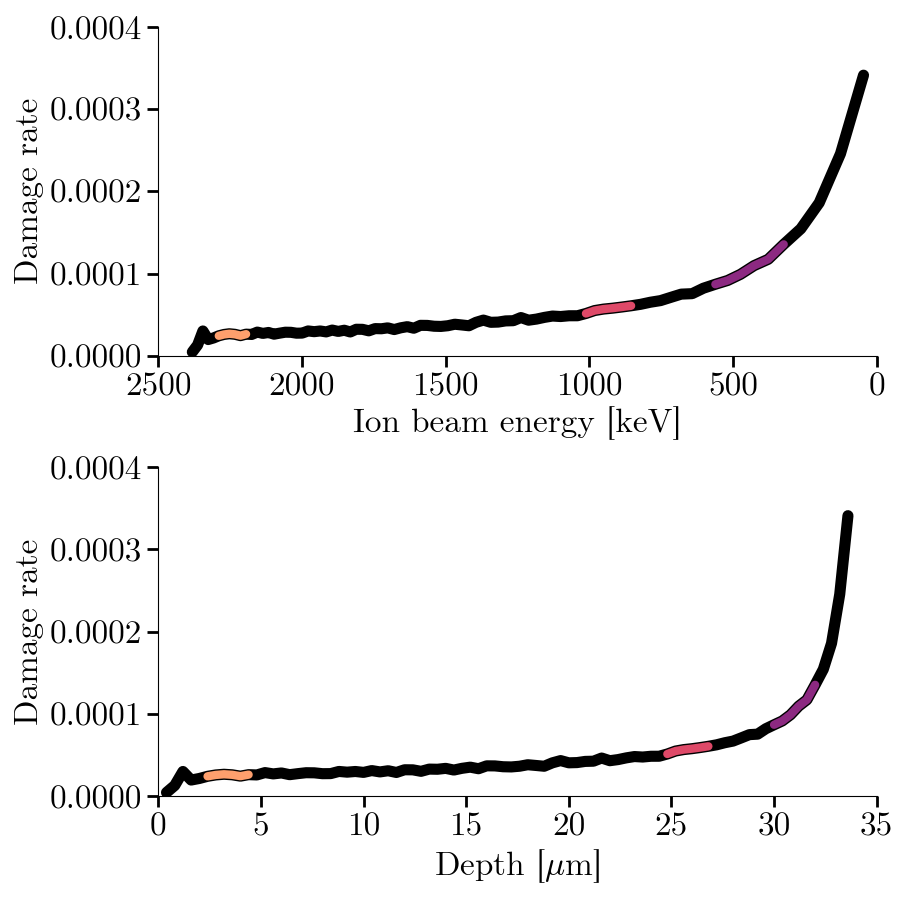

In [5]:
datafp = pd.read_csv(parentDirectory+'2024-05-04_22-17-58_YBCO_H_2400keV_1000000ions_KP/2024-05-05-02-57-59-902061-1000000H-2400keV-1.txt', delim_whitespace=True, usecols=[0, 3], names=['depth', 'fp'], skiprows=1)
datafp['depth'] *= 1e-4

data = pd.read_csv(parentDirectory+'Y1Ba2Cu3O7_2400keVH.txt', skiprows=26, nrows=64, usecols=[0, 1, 4, 5, 6, 7], names=['energy', 'energy_units', 'depth', 'range_units', 'straggle', 'straggle_units'], delim_whitespace=True)
data.loc[data.range_units == 'A', 'depth'] *= 1e-4
data.loc[data.energy_units == 'MeV', 'energy'] *= 1e3

x, y = data.depth.max()-data.depth, data.energy
interpolation = interp1d(x, y)

xfp = datafp.depth
cut = (np.min(x) <= xfp) & (xfp <= np.max(x))
interpolated_energy = interpolation(xfp[cut])


fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y, marker='o', color='k')
ax.plot(datafp.depth[cut], interpolated_energy, color='r', marker='+')
ax.plot(datafp.depth, datafp.fp*3000000)
ax.set_ylabel('Proton Energy [keV]')
ax.set_xlabel('Distance traveled in YBCO [$\mu$m]')
ax.set_xlim(0, 35)
ax.set_ylim(0, 2500)

fig.tight_layout()

fig, ax = plt.subplots(2, 1)
ax[0].plot(interpolated_energy, datafp.fp[cut], color='k', linewidth=8)
ax[1].plot(datafp.depth[cut], datafp.fp[cut], color='k', linewidth=8)

zmin2400keV = datafp.depth[np.argmin(np.abs(2294.36-interpolated_energy))]
cut2400keV = (zmin2400keV <= datafp.depth[cut]) & (datafp.depth[cut] <= zmin2400keV+2)
ax[0].plot(interpolated_energy[cut2400keV], datafp.fp[cut][cut2400keV], linewidth=6, color=dfs.colors_energies['2400'])
ax[1].plot(datafp.depth[cut][cut2400keV], datafp.fp[cut][cut2400keV], linewidth=6, color=dfs.colors_energies['2400'])
profile2400keV = datafp[cut][cut2400keV]

zmin1200keV = datafp.depth[np.argmin(np.abs(1008.8-interpolated_energy))]
cut1200keV = (zmin1200keV <= datafp.depth[cut]) & (datafp.depth[cut] <= zmin1200keV+2)
ax[0].plot(interpolated_energy[cut1200keV], datafp.fp[cut][cut1200keV], linewidth=6, color=dfs.colors_energies['1200'])
ax[1].plot(datafp.depth[cut][cut1200keV], datafp.fp[cut][cut1200keV], linewidth=6, color=dfs.colors_energies['1200'])
profile1200keV = datafp[cut][cut1200keV]

zmin800keV = datafp.depth[np.argmin(np.abs(553.79-interpolated_energy))]
cut800keV = (zmin800keV <= datafp.depth[cut]) & (datafp.depth[cut] <= zmin800keV+2)
ax[0].plot(interpolated_energy[cut800keV], datafp.fp[cut][cut800keV], linewidth=6, color=dfs.colors_energies['800'])
ax[1].plot(datafp.depth[cut][cut800keV], datafp.fp[cut][cut800keV], linewidth=6, color=dfs.colors_energies['800'])
profile0800keV = datafp[cut][cut800keV]

ax[0].set_xlim(2500, 0)
ax[0].set_ylim(0, 0.0004)
ax[1].set_xlim(0, 35)
ax[1].set_ylim(0, 0.0004)
ax[0].set_xlabel('Ion beam energy [keV]')
ax[0].set_ylabel('Damage rate')
ax[1].set_xlabel('Depth [$\mu$m]')
ax[1].set_ylabel('Damage rate')

fig.tight_layout()


## Finally, we can overlay this profile on the straight K-P model to verify that the match and plot the two subfigures used in the paper.

Two plots are produced. The first is a plot of the raw damage profile caused in a tape as a function of depths by protons of the four energies of choice. The goal of this plot is to show the implantation depth of protons at these four energies. The second is a plot of atomic displacements rates in the YBCO layer caused by the same protons of four distinct energies at fixed total beam power. Here the profile was corrected following the above methodology. The goalof this plot is to show that we can obtain a 10x variation in atomic displacements rates at fixed power by adjusting the energy.

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/2789859011.py:21: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Depth in tape [$\mu$m]')
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/2789859011.py:22: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('[Frenkel pairs/$\mu$m-ion]')
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/2789859011.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Depth in REBCO [$\mu$m]')
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_91882/2789859011.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a

Energy:  800
Normalized average displacement rate in YBCO: 12.4535
Average displacement rate in YBCO: 0.5281

Energy: 1200
Normalized average displacement rate in YBCO: 4.4270
Average displacement rate in YBCO: 0.1877

Energy: 2400
Normalized average displacement rate in YBCO: 1.0000
Average displacement rate in YBCO: 0.0424



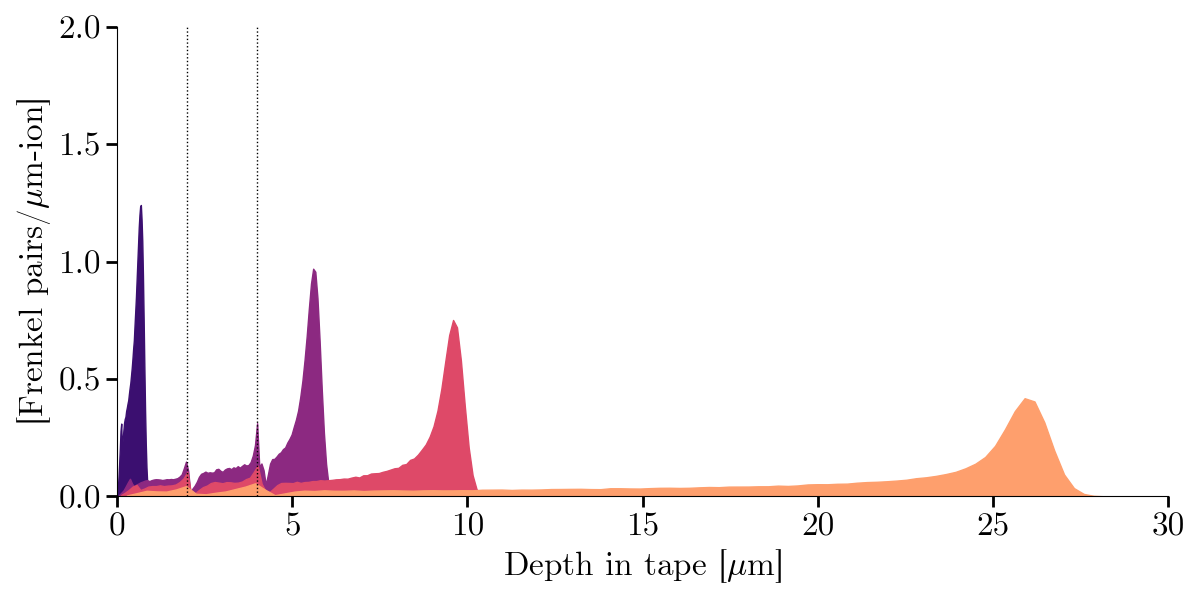

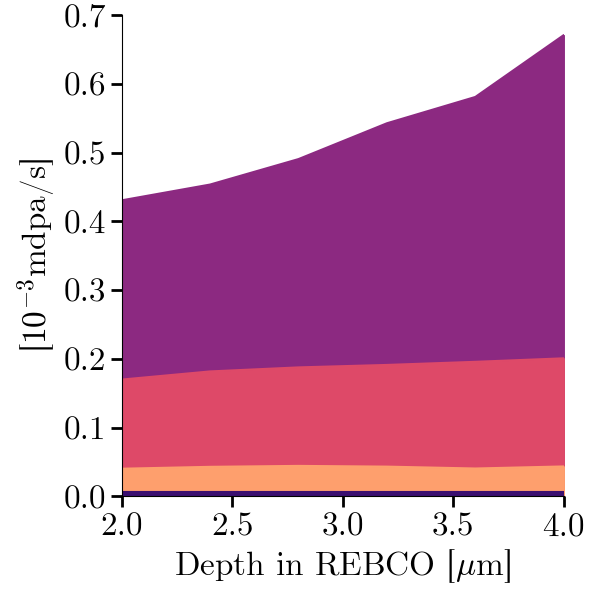

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

ftapes = [
    '2024-05-01_12-11-08_FFJ_H_0150keV_1000000ions_KP/2024-05-01-14-40-06-478348-1000000H-150keV-1.txt',
    '2024-05-01_14-40-06_FFJ_H_0800keV_1000000ions_KP/2024-05-01-20-16-22-711934-1000000H-800keV-1.txt',
    '2024-05-01_20-16-22_FFJ_H_1200keV_1000000ions_KP/2024-05-02-02-16-56-352416-1000000H-1200keV-1.txt',
    '2024-05-02_02-16-56_FFJ_H_2400keV_1000000ions_KP/2024-05-02-09-04-50-844585-1000000H-2400keV-1.txt'
]

for ftape, ibeam, e in zip(ftapes, [240, 45, 30, 15], [150, 800, 1200, 2400]):
    data = pd.read_csv(parentDirectory+ftape, delim_whitespace=True, usecols=[0, 3], names=['depth', 'fp'], skiprows=1)
    data['depth'] *= 1e-4
    cut = (2 <= data.depth) & (data.depth <= 4)
    #ax.plot(data.depth, data.fp, color=c)
    ax.fill_between(data.depth, 0, 1e3*data.fp, color=dfs.colors_energies[str(e)], alpha=1.)
    
ax.axvline(2, linestyle=':', linewidth=1, color='k')
ax.axvline(4, linestyle=':', linewidth=1, color='k')
ax.set_xlim(0, 30)
ax.set_ylim(0, 2)
ax.set_xlabel('Depth in tape [$\mu$m]')
ax.set_ylabel('[Frenkel pairs/$\mu$m-ion]')
#ax.set_title('(a) Kinchin-Pease damage profile')
fig.tight_layout()

plt.savefig(outputDirectory+'figure04a-srim.svg', format='svg', transparent=True)



fig, ax = plt.subplots(figsize=(6, 6))
for profile, ibeam, e in zip([profile0800keV, profile1200keV, profile2400keV], [45, 30, 15], [800, 1200, 2400]):
    x, y = profile.depth-profile.depth.min()+2, 1e3*1.43*profile.fp*ibeam/13
    print('Energy: {:4.0f}'.format(e))
    print('Normalized average displacement rate in YBCO: {:4.4f}'.format(profile.fp.mean()*ibeam/(profile2400keV.fp.mean()*15)))
    print('Average displacement rate in YBCO: {:4.4f}'.format(1e3*1.43*profile.fp.mean()*ibeam/13))
    print()
    
    ax.fill_between(x, 0, y, color=dfs.colors_energies[str(e)], alpha=1.)
    ax.plot(x, y, color=dfs.colors_energies[str(e)], alpha=1)
    
ax.axhline(0, linewidth=8, color=dfs.colors_energies['150'])
ax.set_xlim(2, 4)
ax.set_ylim(0, 0.7)
ax.set_xlabel('Depth in REBCO [$\mu$m]')
ax.set_ylabel('[$10^{-3}$mdpa/s]')
#plt.tick_params(axis='both')
fig.tight_layout()

plt.savefig(outputDirectory+'figure04b-srim.svg', format='svg', transparent=True)
    
#Uncomment to overlay the uncorrected SRIM profile for validation
#ftapes = [
#    '2024-05-01_12-11-08_FFJ_H_0150keV_1000000ions_KP/2024-05-01-14-40-06-478348-1000000H-150keV-1.txt',
#    '2024-05-01_14-40-06_FFJ_H_0800keV_1000000ions_KP/2024-05-01-20-16-22-711934-1000000H-800keV-1.txt',
#    '2024-05-01_20-16-22_FFJ_H_1200keV_1000000ions_KP/2024-05-02-02-16-56-352416-1000000H-1200keV-1.txt',
#    '2024-05-02_02-16-56_FFJ_H_2400keV_1000000ions_KP/2024-05-02-09-04-50-844585-1000000H-2400keV-1.txt'
#]

#for ftape, ibeam, c in zip(ftapes, [240, 45, 30, 15], dfs.palette):
#    data = pd.read_csv('../data/srim/'+ftape, delim_whitespace=True, usecols=[0, 3], names=['depth', 'fp'], skiprows=1)
#    data['depth'] *= 1e-4
#    cut = (2 <= data.depth) & (data.depth <= 4)
#    ax.plot(data.depth, 1.43*ibeam*data.fp, color='k', linestyle='--')
#'''